In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("Electric_Vehicle_Charging_Stations_in_New_York.csv")

In [3]:
df.head(5)

Fuel Type Code     Station Name      Street Address  \
0           ELEC        JATC LU41  3546 California Rd   
1           ELEC   GE WattStation         214  3rd St   
2           ELEC  STATION 1 @ VIL        70 E Main St   
3           ELEC   CITY OF ITHACA       118 Dryden Rd   
4           ELEC     LANDING PARK          70 Main St   

         Intersection Directions          City State    ZIP  Plus4  \
0                      JATC LU41  Orchard Park    NY  14127    NaN   
1                            NaN      Brooklyn    NY  11215    NaN   
2  VICTOR; In lot next to church        Victor    NY  14564    NaN   
3              DRYDEN; 2nd floor        Ithaca    NY  14850    NaN   
4                    COEYMANS; -      Coeymans    NY  12045    NaN   

  Station Phone Status Code  ...   Latitude  Longitude Date Last Confirmed  \
0  888-758-4389           E  ...  42.787197 -78.787821          05/27/2020   
1  855-443-3873           E  ...  40.675331 -73.988563          05/15/2020   
2  888-758-4389           E  ...  42.981755 -77.408360          05/27/2020   
3  888-758-4389           E  ...  42.442142 -76.486112          05/27/2020   
4  888-758-4389           E  ...  42.472557 -73.790396          05/27/2020   

      ID           Updated At  Owner Type Code  Federal Agency ID  \
0  62127  2020-05-27 09:20:32              NaN                NaN   
1  73056  2020-05-15 10:00:11              NaN                NaN   
2  88701  2020-05-27 09:20:32              NaN                NaN   
3  92327  2020-05-27 09:20:32              NaN                NaN   
4  99993  2020-05-27 09:20:32              NaN                NaN   

   Federal Agency Name Open Date EV Connector Types  
0                  NaN       NaN              J1772  
1                  NaN       NaN              J1772  
2                  NaN       NaN              J1772  
3                  NaN       NaN              J1772  
4                  NaN       NaN              J1772  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           1677 non-null   object 
 1   Station Name             1677 non-null   object 
 2   Street Address           1677 non-null   object 
 3   Intersection Directions  773 non-null    object 
 4   City                     1677 non-null   object 
 5   State                    1677 non-null   object 
 6   ZIP                      1677 non-null   int64  
 7   Plus4                    0 non-null      float64
 8   Station Phone            1665 non-null   object 
 9   Status Code              1677 non-null   object 
 10  Expected Date            0 non-null      float64
 11  Groups With Access Code  1677 non-null   object 
 12  Access Days Time         1677 non-null   object 
 13  Cards Accepted           46 non-null     object 
 14  EV Level1 EVSE Num      

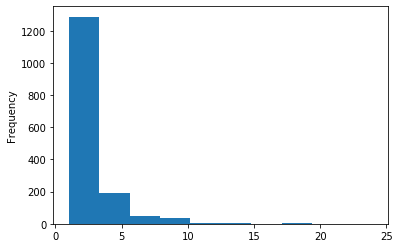

In [6]:
df['EV Level2 EVSE Num'].plot(kind='hist');

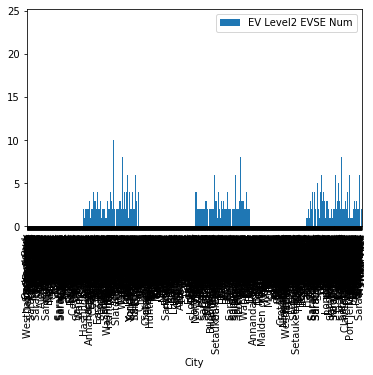

In [7]:
df.plot(kind='bar',x='City',y='EV Level2 EVSE Num')

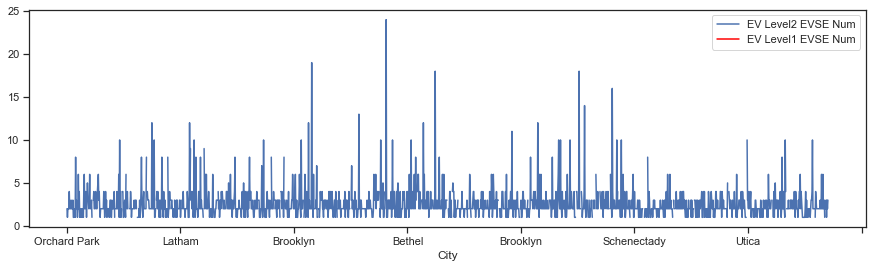

In [95]:
plt.figure(figsize=(15,4))

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='City',y='EV Level2 EVSE Num',ax=ax)
df.plot(kind='line',x='City',y='EV Level1 EVSE Num', color='red', ax=ax)

plt.show()

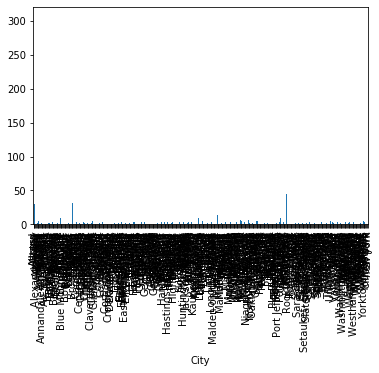

In [9]:
df.groupby('City')['Station Name'].nunique().plot(kind='bar')
plt.show()

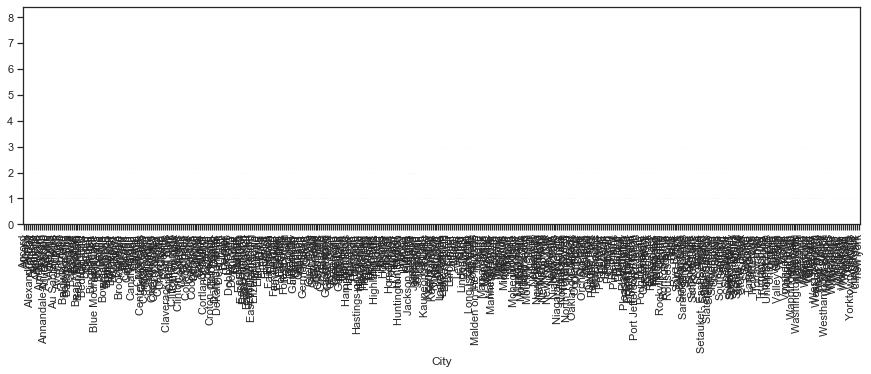

In [92]:
plt.figure(figsize=(15,4))

df.groupby('City')['EV Connector Types'].nunique().plot(kind='bar')
plt.show()

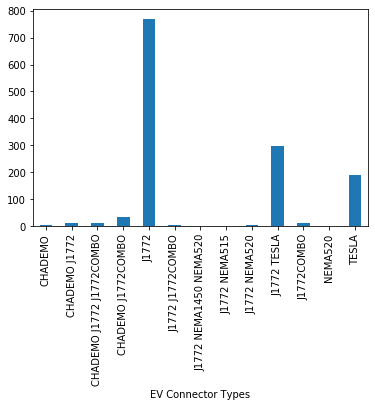

In [12]:
df.groupby('EV Connector Types')['Station Name'].nunique().plot(kind='bar')
plt.show()

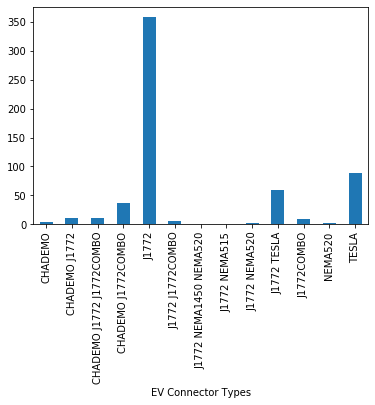

In [13]:
df.groupby('EV Connector Types')['City'].nunique().plot(kind='bar')
plt.show()

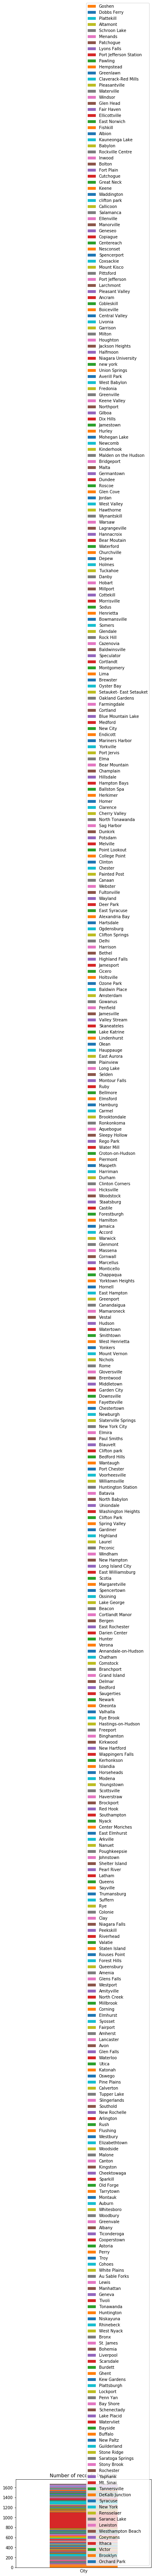

In [14]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','City']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('City')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['City'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

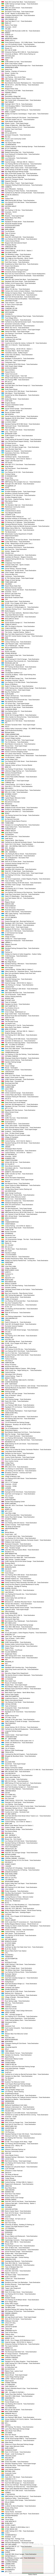

In [16]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','Station Name']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by City')

# other it'll show up as 'dummy' 
plt.xlabel('Station Name')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['Station Name'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [17]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','EV Network']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by City')

# other it'll show up as 'dummy' 
plt.xlabel('EV Network')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['EV Network'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

EV Network

SyntaxError: invalid syntax (<ipython-input-17-b140f813af84>, line 24)

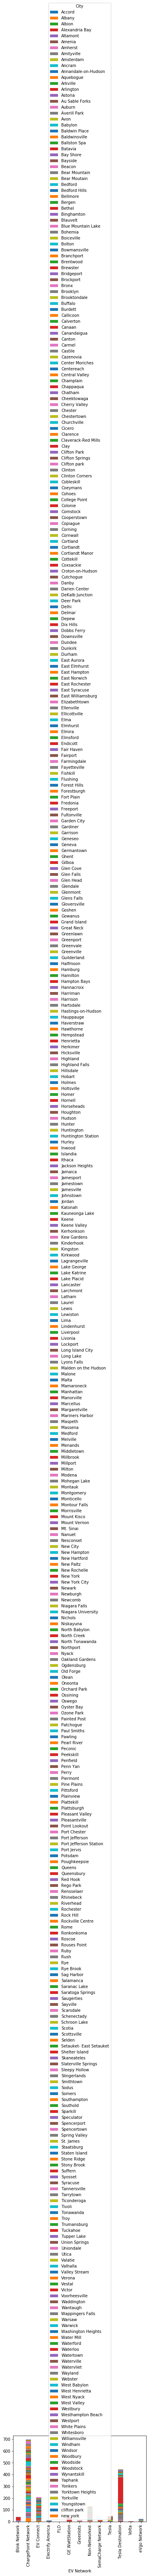

In [19]:
df.groupby(['EV Network','City']).size().unstack().plot(kind='bar',stacked=True)
ax.get_legend().remove()
plt.show()

In [ ]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [20]:
df[['EV Connector Types']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

TypeError: no numeric data to plot

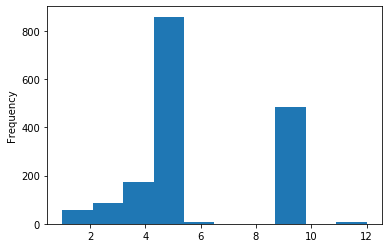

In [21]:
df['Date Last Confirmed'] = pd.to_datetime(df['Date Last Confirmed'], infer_datetime_format=True)

plt.clf()
df['Date Last Confirmed'].map(lambda d: d.month).plot(kind='hist')
plt.show()

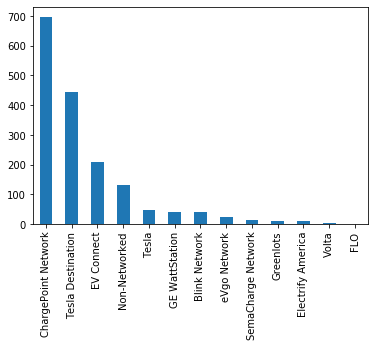

In [26]:
df['EV Network'].value_counts().plot(kind='bar')

In [27]:
df.describe()

ZIP  Plus4  Expected Date  EV Level1 EVSE Num  \
count   1677.000000    0.0            0.0           10.000000   
mean   12064.155039    NaN            NaN            1.200000   
std     1506.032119    NaN            NaN            0.421637   
min    10001.000000    NaN            NaN            1.000000   
25%    10595.000000    NaN            NaN            1.000000   
50%    12110.000000    NaN            NaN            1.000000   
75%    13021.000000    NaN            NaN            1.000000   
max    14901.000000    NaN            NaN            2.000000   

       EV Level2 EVSE Num  EV DC Fast Count  EV Other Info     Latitude  \
count         1574.000000        129.000000            0.0  1677.000000   
mean             2.653748          4.372093            NaN    41.903175   
std              1.873340          4.257475            NaN     1.111217   
min              1.000000          1.000000            NaN    40.513370   
25%              2.000000          1.000000            NaN    40.771561   
50%              2.000000          2.000000            NaN    41.791563   
75%              3.000000          8.000000            NaN    42.895794   
max             24.000000         20.000000            NaN    44.991537   

         Longitude             ID  Federal Agency ID  
count  1677.000000    1677.000000                1.0  
mean    -74.677142  110896.008945               25.0  
std       1.635570   30682.380918                NaN  
min     -79.335875   36532.000000               25.0  
25%     -74.859153   93540.000000               25.0  
50%     -73.972015  115073.000000               25.0  
75%     -73.797207  124142.000000               25.0  
max     -71.932673  156813.000000               25.0

In [31]:
df2 = df.set_index("EV Network", drop = False)

In [32]:
df2.head()

Fuel Type Code     Station Name      Street Address  \
EV Network                                                                
ChargePoint Network           ELEC        JATC LU41  3546 California Rd   
GE WattStation                ELEC   GE WattStation         214  3rd St   
ChargePoint Network           ELEC  STATION 1 @ VIL        70 E Main St   
ChargePoint Network           ELEC   CITY OF ITHACA       118 Dryden Rd   
ChargePoint Network           ELEC     LANDING PARK          70 Main St   

                           Intersection Directions          City State    ZIP  \
EV Network                                                                      
ChargePoint Network                      JATC LU41  Orchard Park    NY  14127   
GE WattStation                                 NaN      Brooklyn    NY  11215   
ChargePoint Network  VICTOR; In lot next to church        Victor    NY  14564   
ChargePoint Network              DRYDEN; 2nd floor        Ithaca    NY  14850   
ChargePoint Network                    COEYMANS; -      Coeymans    NY  12045   

                     Plus4 Station Phone Status Code  ...   Latitude  \
EV Network                                            ...              
ChargePoint Network    NaN  888-758-4389           E  ...  42.787197   
GE WattStation         NaN  855-443-3873           E  ...  40.675331   
ChargePoint Network    NaN  888-758-4389           E  ...  42.981755   
ChargePoint Network    NaN  888-758-4389           E  ...  42.442142   
ChargePoint Network    NaN  888-758-4389           E  ...  42.472557   

                     Longitude Date Last Confirmed     ID  \
EV Network                                                  
ChargePoint Network -78.787821          2020-05-27  62127   
GE WattStation      -73.988563          2020-05-15  73056   
ChargePoint Network -77.408360          2020-05-27  88701   
ChargePoint Network -76.486112          2020-05-27  92327   
ChargePoint Network -73.790396          2020-05-27  99993   

                              Updated At  Owner Type Code  Federal Agency ID  \
EV Network                                                                     
ChargePoint Network  2020-05-27 09:20:32              NaN                NaN   
GE WattStation       2020-05-15 10:00:11              NaN                NaN   
ChargePoint Network  2020-05-27 09:20:32              NaN                NaN   
ChargePoint Network  2020-05-27 09:20:32              NaN                NaN   
ChargePoint Network  2020-05-27 09:20:32              NaN                NaN   

                     Federal Agency Name Open Date EV Connector Types  
EV Network                                                             
ChargePoint Network                  NaN       NaN              J1772  
GE WattStation                       NaN       NaN              J1772  
ChargePoint Network                  NaN       NaN              J1772  
ChargePoint Network                  NaN       NaN              J1772  
ChargePoint Network                  NaN       NaN              J1772  

[5 rows x 31 columns]

In [34]:
EV_Network = df['EV Network']

In [35]:
EV_Network.head()

0    ChargePoint Network
1         GE WattStation
2    ChargePoint Network
3    ChargePoint Network
4    ChargePoint Network
Name: EV Network, dtype: object

In [36]:
EVCity = df[['EV Network', 'City']]
EVCity

EV Network          City
0     ChargePoint Network  Orchard Park
1          GE WattStation      Brooklyn
2     ChargePoint Network        Victor
3     ChargePoint Network        Ithaca
4     ChargePoint Network      Coeymans
...                   ...           ...
1672    Tesla Destination      New York
1673        Non-Networked        Auburn
1674    Tesla Destination      New York
1675  ChargePoint Network    Watervliet
1676    Tesla Destination      New York

[1677 rows x 2 columns]

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

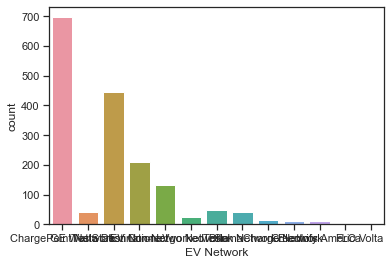

In [40]:
sns.countplot(x='EV Network',data=EVCity)

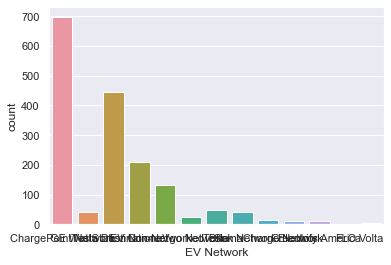

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(x="EV Network", data=EVCity)

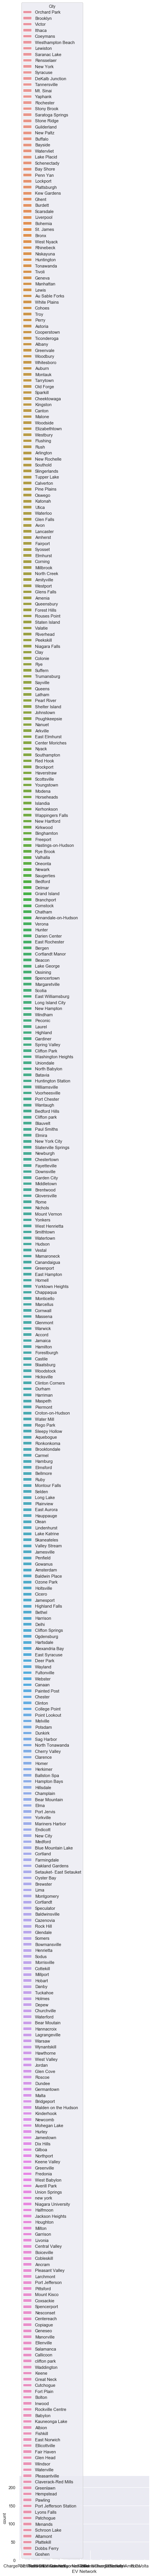

In [44]:
ax = sns.countplot(x="EV Network", hue ="City", data=EVCity)

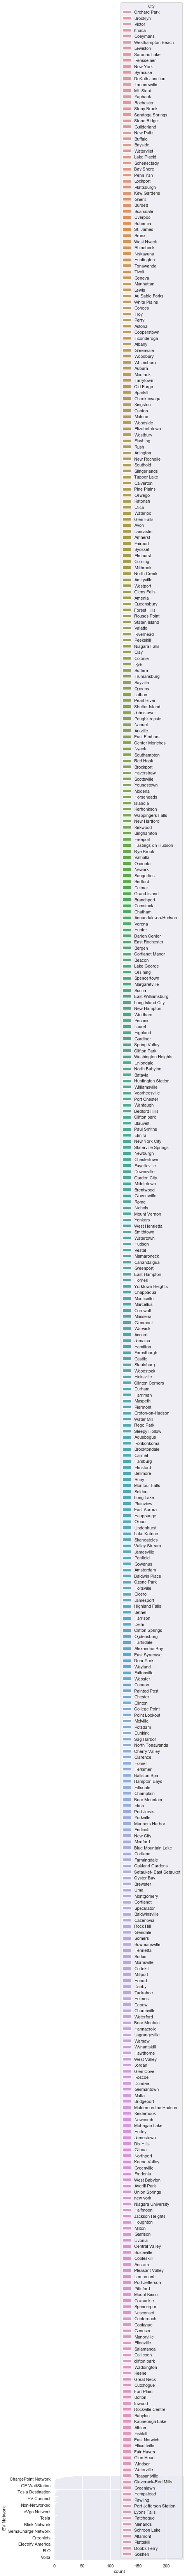

In [45]:
ax = sns.countplot(y="EV Network", hue ="City", data=EVCity)

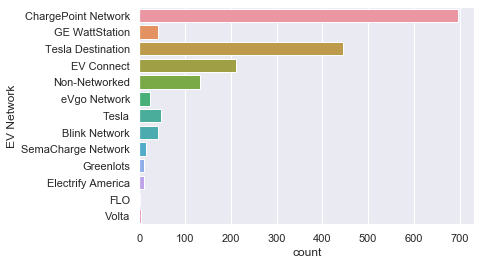

In [46]:
ax = sns.countplot(y="EV Network", data=EVCity)

In [47]:
EVCity2 = df[['EV Network', 'City', 'EV Connector Types']]
EVCity2

EV Network          City EV Connector Types
0     ChargePoint Network  Orchard Park              J1772
1          GE WattStation      Brooklyn              J1772
2     ChargePoint Network        Victor              J1772
3     ChargePoint Network        Ithaca              J1772
4     ChargePoint Network      Coeymans              J1772
...                   ...           ...                ...
1672    Tesla Destination      New York        J1772 TESLA
1673        Non-Networked        Auburn              J1772
1674    Tesla Destination      New York        J1772 TESLA
1675  ChargePoint Network    Watervliet              J1772
1676    Tesla Destination      New York        J1772 TESLA

[1677 rows x 3 columns]

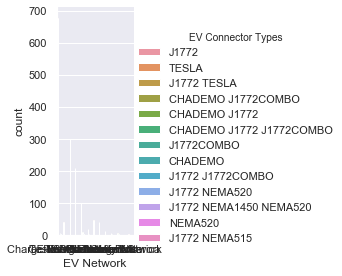

In [49]:
g = sns.catplot(x="EV Network", hue="EV Connector Types",
                data=EVCity2, kind="count",
                height=4, aspect=.7);

AttributeError: 'Rectangle' object has no property 'figsize'

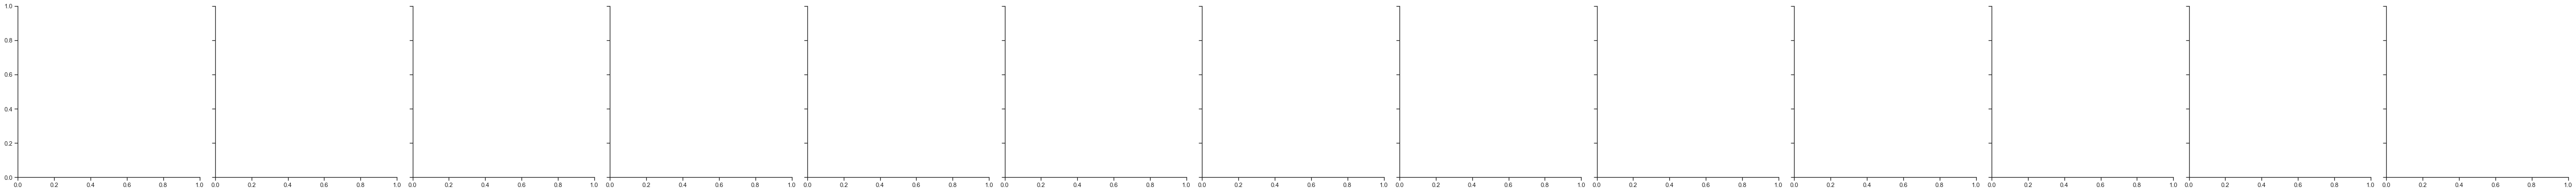

In [83]:
g = sns.catplot(x="EV Network", col="EV Connector Types",
                data=EVCity2, kind="count",
                figsize=(20,10));

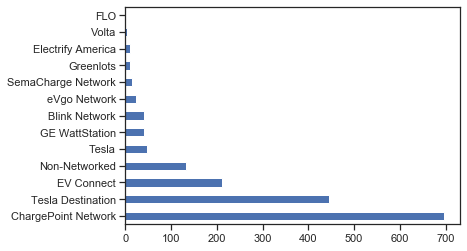

In [82]:
df['EV Network'].value_counts().head(30).plot(kind='barh')

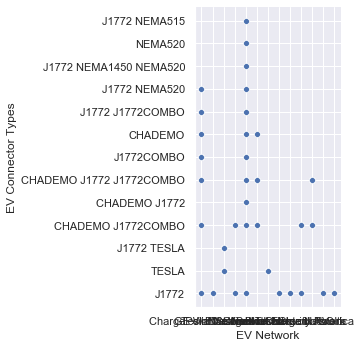

In [51]:
sns.relplot(x="EV Network", y="EV Connector Types", data=EVCity2);

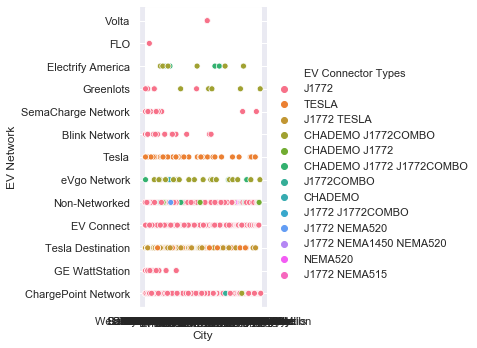

In [52]:
sns.relplot(x="City", y="EV Network", hue="EV Connector Types", data=EVCity2);

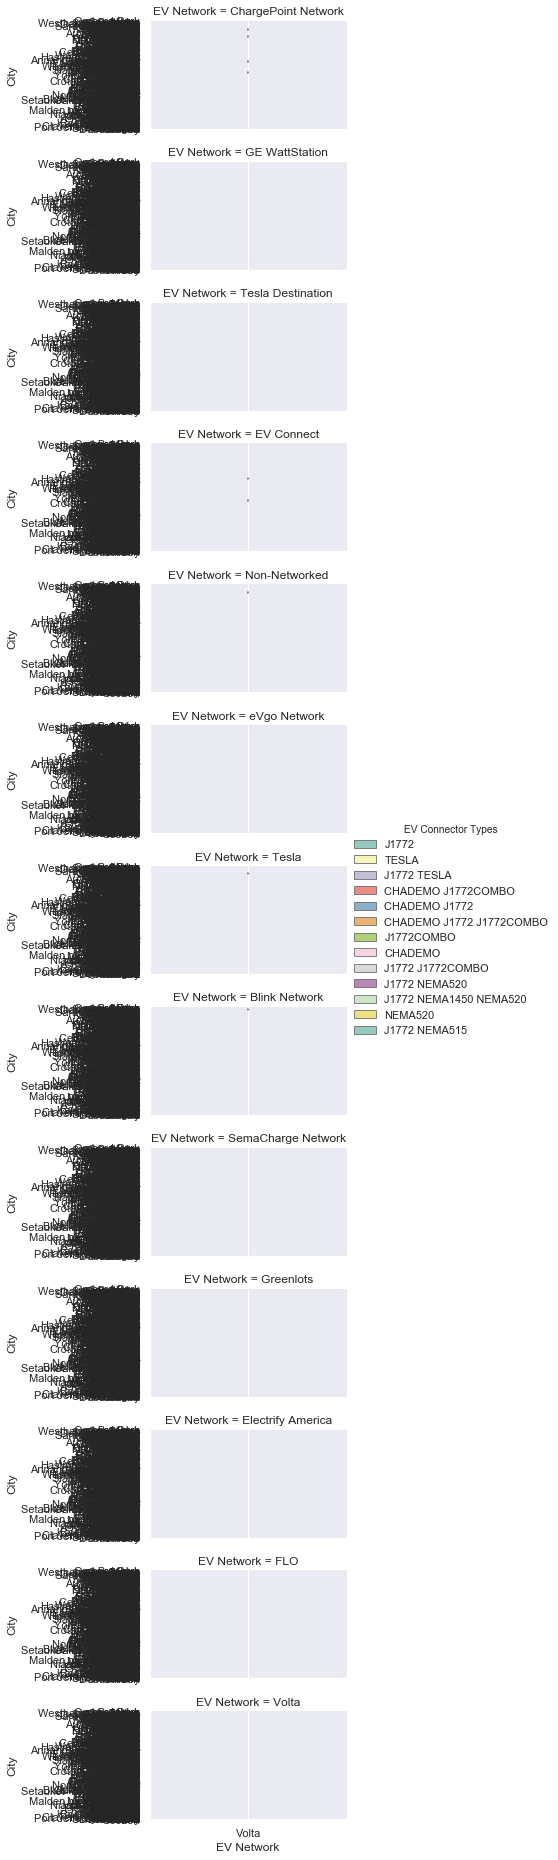

In [57]:
g = sns.catplot(x="EV Network", y="City",
                hue="EV Connector Types", row="EV Network",
                data=EVCity2[EVCity2.City.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

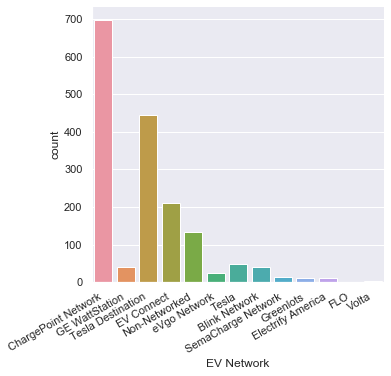

In [59]:
ax = sns.catplot(x='EV Network',kind='count',data=EVCity2,orient="h")
ax.fig.autofmt_xdate()

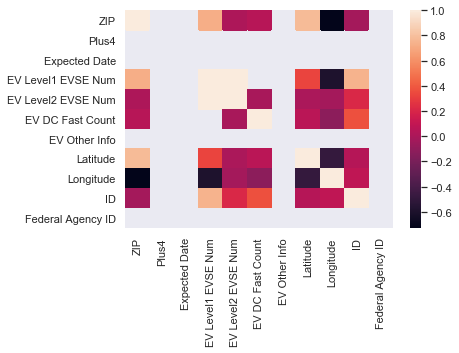

In [61]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr)

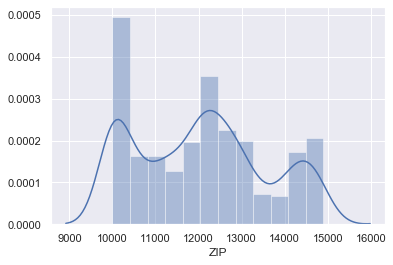

In [63]:
2
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.ZIP)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Fuel Type Code           1677 non-null   object        
 1   Station Name             1677 non-null   object        
 2   Street Address           1677 non-null   object        
 3   Intersection Directions  773 non-null    object        
 4   City                     1677 non-null   object        
 5   State                    1677 non-null   object        
 6   ZIP                      1677 non-null   int64         
 7   Plus4                    0 non-null      float64       
 8   Station Phone            1665 non-null   object        
 9   Status Code              1677 non-null   object        
 10  Expected Date            0 non-null      float64       
 11  Groups With Access Code  1677 non-null   object        
 12  Access Days Time         1677 non-

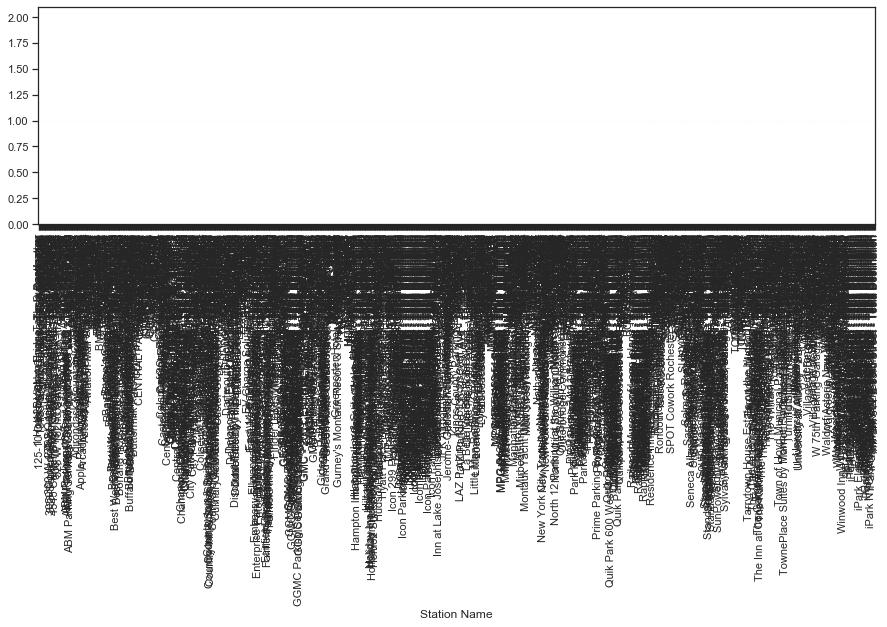

In [86]:
plt.figure(figsize=(15,4))

df.groupby('Station Name')['EV Connector Types'].nunique().plot(kind='bar')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

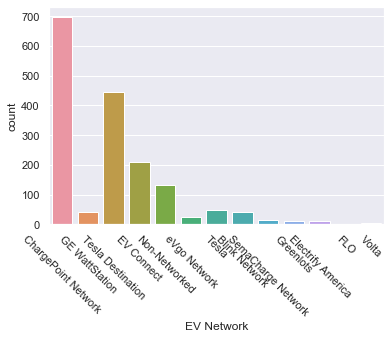

In [68]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='EV Network', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

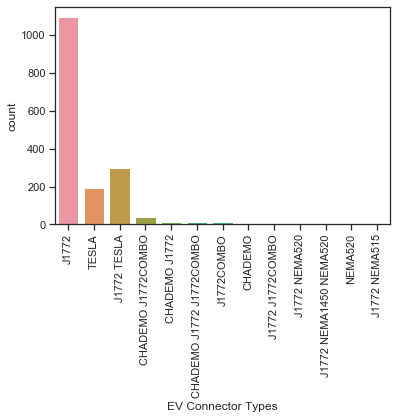

In [79]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='EV Connector Types', data=df)

# Rotate x-labels
sns.set_style('ticks')
plt.xticks(rotation=90)

ValueError: could not convert string to float: 'Orchard Park'

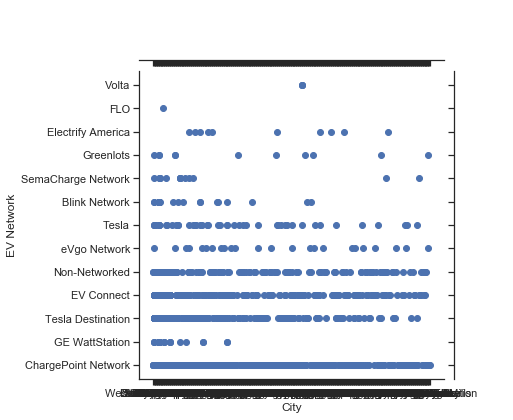

In [77]:
# Joint Distribution Plot
sns.jointplot(x='City', y='EV Network', data=df)

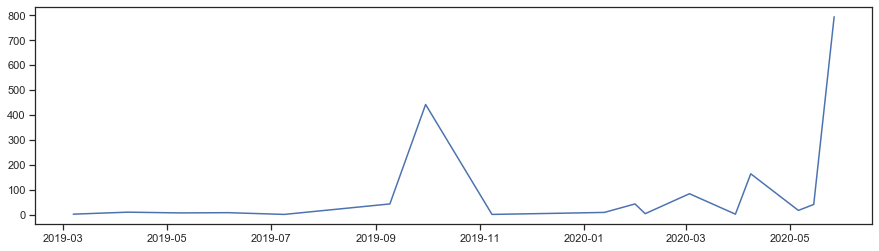

In [85]:
plt.figure(figsize=(15,4))
plt.plot(df['Date Last Confirmed'].value_counts().sort_index())

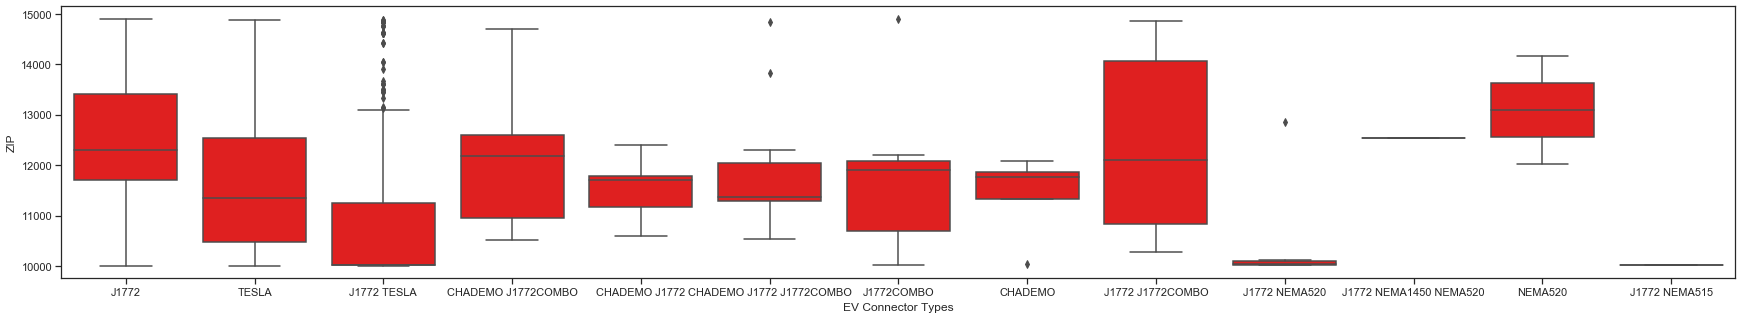

In [90]:
plt.figure(figsize=(30,5))
sns.boxplot(
    data=df,
    x='EV Connector Types',
    y='ZIP',
    color='red')

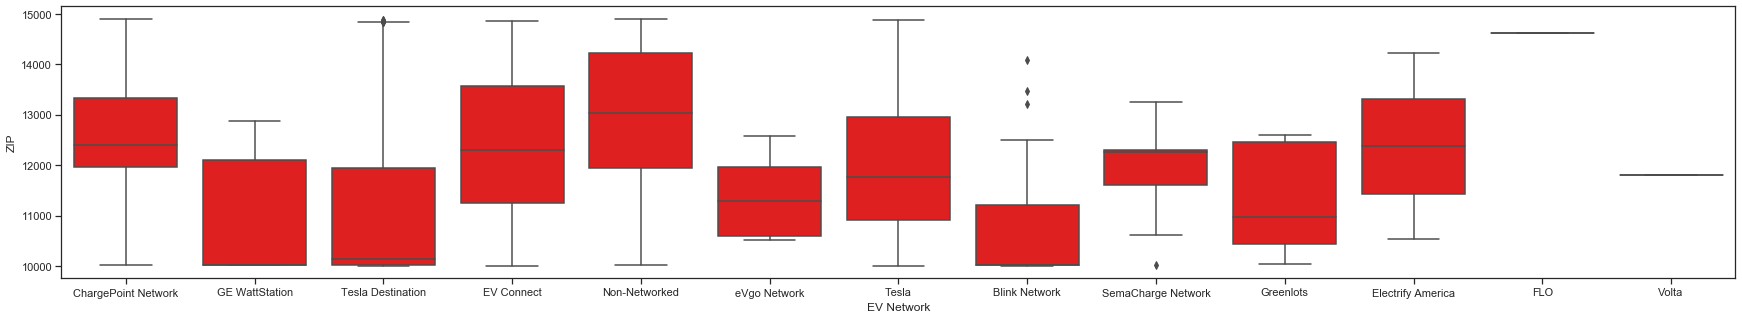

In [91]:
plt.figure(figsize=(30,5))
sns.boxplot(
    data=df,
    x='EV Network',
    y='ZIP',
    color='red')

In [98]:
df['ZIP'].value_counts()[]

10019    34
12866    33
12401    22
10016    22
14850    21
         ..
12514     1
13320     1
13323     1
13339     1
10468     1
Name: ZIP, Length: 559, dtype: int64

In [102]:
df['ZIP'].value_counts()[:20]

10019    34
12866    33
12401    22
10016    22
14850    21
12180    20
10022    20
12110    19
11201    19
10021    19
14623    18
10065    17
10011    17
10023    16
12203    15
12561    14
12845    14
10024    14
10025    14
12801    13
Name: ZIP, dtype: int64

In [103]:
df['EV Network'].value_counts()[:20]

ChargePoint Network    697
Tesla Destination      444
EV Connect             210
Non-Networked          133
Tesla                   48
GE WattStation          41
Blink Network           41
eVgo Network            24
SemaCharge Network      14
Greenlots               11
Electrify America       10
Volta                    3
FLO                      1
Name: EV Network, dtype: int64

In [104]:
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('EV Network')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Market Share')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

NameError: name 'GridSpec' is not defined

<Figure size 2880x1440 with 0 Axes>

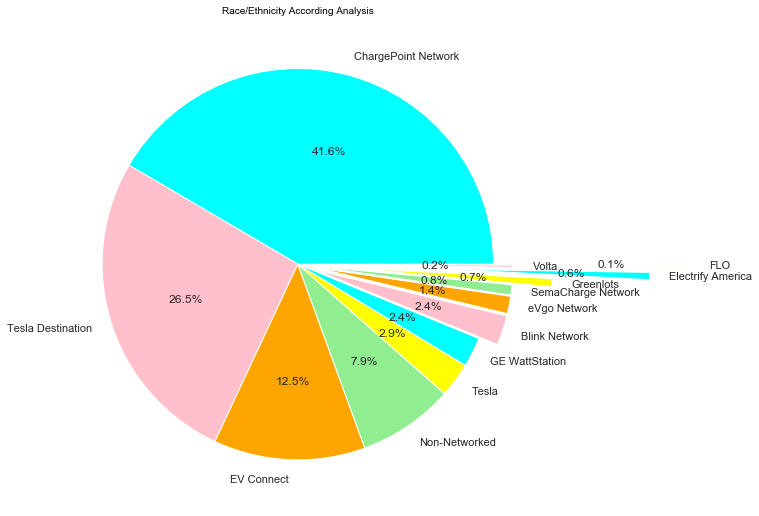

In [123]:
labels=df['EV Network'].value_counts().index
colors=['cyan','pink','orange','lightgreen','yellow']
explode=[0,0,0,0,0,0,0.1,0.1,0.1,0.3,0.8,0.1,1]
values=df['EV Network'].value_counts().values

#visualization
plt.figure(figsize=(9,9))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()